In [1]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, 
from matplotlib import pyplot as plt #Visualization of the data....
%matplotlib inline
import seaborn as sns

from datetime import date
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [2]:
#READ THE DATASET...
main_df = pd.read_csv(r"C:\Users\DELL\Desktop\numpy/marketing_campaign.csv", sep="\t")
main_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
#CREATING A COPY OF THE RAW DATASET....
df = main_df.copy()

In [4]:
#SHAPE OF THE DATASET.....
print("Shape of the DataFrame is :",df.shape)

Shape of the DataFrame is : (2240, 29)


In [5]:
#CHECK THE COLUMNS NAME....
print("Columns in DataFrame is :\n",df.columns)

Columns in DataFrame is :
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
#LETS DO THE BASIC STATISTICS ON CONTINOUS FEATURES...
df.describe()#.style.set_properties(**{"background-color": "#fffc99","color": "black", "border-color": "black"})

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
df.isnull().sum().sort_values(ascending = False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [9]:
#FILL THE MISSING VALUES WITH THE MEDIAN VALUES.. 
df['Income']=df['Income'].fillna(df['Income'].median())

In [10]:
#CHECKING IF ANY NAN IS PRESENT IN COLUMN OR NOT....
df.isna().any()


ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [11]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [12]:
#FINDING THE NUMBER OF UNIQUE VALUES PRESENT IN EACH COLUMN...
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [13]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

In [14]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Year_Birth"
print("Unique categories present in the Year_Birth:",df["Year_Birth"].value_counts())

Unique categories present in the Year_Birth: 1976    89
1971    87
1975    83
1972    79
1970    77
1978    77
1973    74
1965    74
1969    71
1974    69
1956    55
1979    53
1958    53
1977    52
1952    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1963    45
1982    45
1967    44
1962    44
1951    43
1957    43
1986    42
1983    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1949    30
1989    30
1988    29
1950    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1943     7
1944     7
1995     5
1993     5
1994     3
1996     2
1900     1
1941     1
1899     1
1940     1
1893     1
Name: Year_Birth, dtype: int64


In [15]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [16]:
#CHANGING CATEGORY INTO "UG" AND "PG" ONLY....
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')  
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')

Unique categories present in the Education: Post Graduate     2186
Under Graduate      54
Name: Education, dtype: int64




Text(0.5, 1.0, 'Frequency Of Each Category in the Education Variable \n')

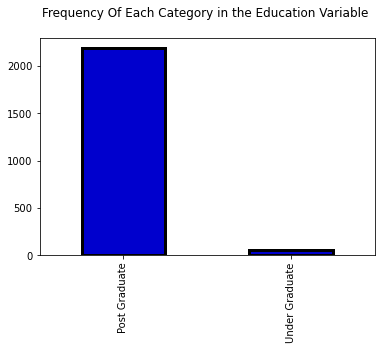

In [17]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Education"
print("Unique categories present in the Education:",df["Education"].value_counts())
print('\n')

#VISUALIZING THE "Education"
df['Education'].value_counts().plot(kind='bar',color = 'mediumblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Education Variable \n")

Observation #01 
97.58% of Customers in the dataset are "Post Graduate".
2.410% of Customers in the dataset are "Under Graduate".

In [18]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [19]:
#REPLACING VALUES IN Marital_status..
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

Unique categories present in the Marital_Status: Relationship    1444
Single           796
Name: Marital_Status, dtype: int64




Text(0.5, 1.0, 'Frequency Of Each Category in the Marital_Status Variable \n')

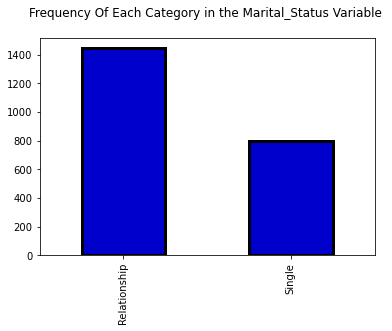

In [20]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Marital_Status"
print("Unique categories present in the Marital_Status:",df['Marital_Status'].value_counts())
print("\n")


#VISUALIZING THE "Marital_Status"
df['Marital_Status'].value_counts().plot(kind='bar',color = 'MediumBlue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Marital_Status Variable \n")

64.46% of Customers in the dataset are in "Relationship".
*35.53% of Customers in the dataset are "Single".

In [21]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Kids'] = df['Kidhome'] + df['Teenhome']
# Combining different dataframe into a single column to reduce the number of dimension

df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Expenses'].head(10)

df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [22]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

In [23]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head(10).style.set_properties(**{"background-color": "#fffc99","color": "black", "border-color": "black"})

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,1957,Post Graduate,Single,58138.000000,04-09-2012,58,0,1,0,1617,0,25
1,1954,Post Graduate,Single,46344.000000,08-03-2014,38,0,0,2,27,0,6
2,1965,Post Graduate,Relationship,71613.000000,21-08-2013,26,0,0,0,776,0,21
3,1984,Post Graduate,Relationship,26646.000000,10-02-2014,26,0,0,1,53,0,8
4,1981,Post Graduate,Relationship,58293.000000,19-01-2014,94,0,0,1,422,0,19
5,1967,Post Graduate,Relationship,62513.000000,09-09-2013,16,0,0,1,716,0,22
6,1971,Post Graduate,Single,55635.000000,13-11-2012,34,0,0,1,590,0,21
7,1985,Post Graduate,Relationship,33454.000000,08-05-2013,32,0,0,1,169,0,10
8,1974,Post Graduate,Relationship,30351.000000,06-06-2013,19,0,1,1,46,0,6
9,1950,Post Graduate,Relationship,5648.000000,13-03-2014,68,0,0,2,49,1,2


In [24]:
x = df.columns 
for i in x:
     print(i)

Year_Birth
Education
Marital_Status
Income
Dt_Customer
Recency
Complain
Response
Kids
Expenses
TotalAcceptedCmp
NumTotalPurchases


In [25]:
#NUMBER OF DAYS A CUSTOMER WAS ENGAGED WITH COMPANY...... 
#CHANGING "Dt_customer" into timestamp format......

df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['First_day'] = '01-01-2015'
df['First_day'] = pd.to_datetime(df.First_day)
df['Day_engaged'] = (df['First_day'] - df['Dt_Customer']).dt.days

In [26]:
#ADDING A COLUMN "Age" IN THE DATAFRAME....
df['Age'] = (pd.Timestamp('now').year) - (pd.to_datetime(df['Dt_Customer']).dt.year)

#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Age"
print("Unique categories present in the Age:",df['Age'].value_counts())
print("\n")

Unique categories present in the Age: 8    1189
7     557
9     494
Name: Age, dtype: int64




In [27]:
df=df.drop(columns=["Dt_Customer", "First_day", "Year_Birth", "Dt_Customer", "Recency", "Complain","Response"],axis=1)


In [28]:
#REARRANGE THE ORDER OF COLUMNS:-
order = [0,1,3,4,6,7,8,2,5]
df = df[[df.columns[i] for i in order]]

In [29]:
df.shape

(2240, 9)

# Finding the correlation

<AxesSubplot:>

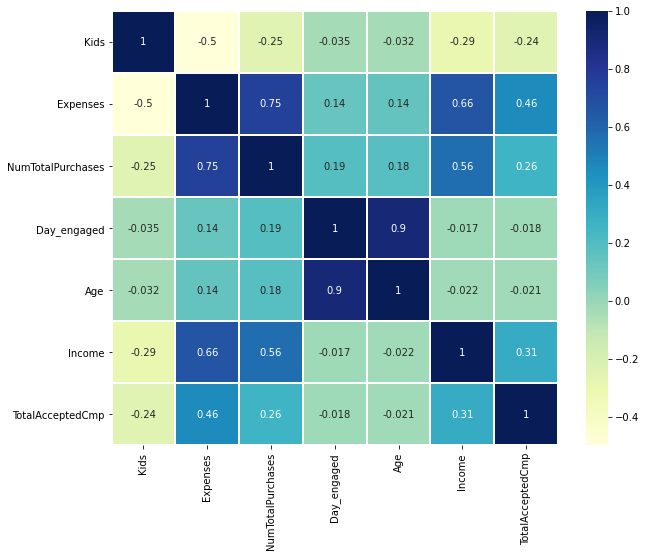

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap = 'YlGnBu',linewidths=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Kids               2240 non-null   int64  
 3   Expenses           2240 non-null   int64  
 4   NumTotalPurchases  2240 non-null   int64  
 5   Day_engaged        2240 non-null   int64  
 6   Age                2240 non-null   int64  
 7   Income             2240 non-null   float64
 8   TotalAcceptedCmp   2240 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 157.6+ KB


In [32]:
cont_features = df.iloc[:, 2:9] #from Z_Cost to Kids
print(type(cont_features))
print('\n')
print(cont_features.head())

<class 'pandas.core.frame.DataFrame'>


   Kids  Expenses  NumTotalPurchases  Day_engaged  Age   Income  \
0     0      1617                 25          997    9  58138.0   
1     2        27                  6          151    7  46344.0   
2     0       776                 21          498    8  71613.0   
3     1        53                  8           91    7  26646.0   
4     1       422                 19          347    7  58293.0   

   TotalAcceptedCmp  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [33]:
cont_features

,Kids,Expenses,NumTotalPurchases,Day_engaged,Age,Income,TotalAcceptedCmp
0,0,1617,25,997,9,58138.0,0
1,2,27,6,151,7,46344.0,0
2,0,776,21,498,8,71613.0,0
3,1,53,8,91,7,26646.0,0
4,1,422,19,347,7,58293.0,0
...,...,...,...,...,...,...,...
2235,1,1341,18,567,8,61223.0,0
2236,3,444,22,87,7,64014.0,1
2237,0,1241,19,341,7,56981.0,1
2238,1,843,23,342,7,69245.0,0


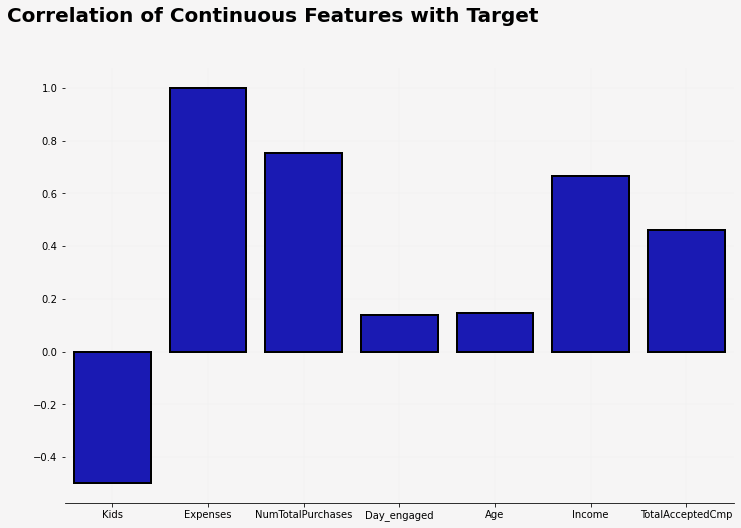

In [34]:
import matplotlib
background_color = "#f6f5f5"

fig = plt.figure(figsize=(12, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#2f5586", "#f6f5f5","#2f5586"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Continuous Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(cont_features.corrwith(df['Expenses']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='mediumblue', zorder=3, edgecolor='black', linewidth=2)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

Observation
*Highest correlation between features is 0.7.
*There is no continuous features that has correlation with Expenses below 0.7 and above 0.15.
*Day_engaged and Age has the lowest correlation with expenses,almost reaching 0.14 while NumTotalPurchases has the highest correlation with the expenses.

In [35]:
df.dtypes

Education             object
Marital_Status        object
Kids                   int64
Expenses               int64
NumTotalPurchases      int64
Day_engaged            int64
Age                    int64
Income               float64
TotalAcceptedCmp       int64
dtype: object

In [36]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(" Object are:",cate)

 Object are: ['Education', 'Marital_Status']


In [37]:
Int = []
for i in df.columns:
    if (df[i].dtypes == "int64"):
        Int.append(i)

print(" Integers are:",Int)

 Integers are: ['Kids', 'Expenses', 'NumTotalPurchases', 'Day_engaged', 'Age', 'TotalAcceptedCmp']


In [38]:
Float = []
for i in df.columns:
    if (df[i].dtypes == "float64"):
        Float.append(i)

print("Float are:",Float)

Float are: ['Income']


In [39]:
from sklearn.preprocessing import LabelEncoder
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [40]:
df1 = df.copy()

In [41]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df1.values)
sf_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [42]:
X = sf_df.iloc[:, [7, 3]].values
print(X)

[[ 0.23569584  1.67941681]
 [-0.23545419 -0.96127545]
 [ 0.77399892  0.28267329]
 ...
 [ 0.18947568  1.05495122]
 [ 0.67940139  0.39394775]
 [ 0.02520835 -0.7204576 ]]


In [43]:
sf_df

,Education,Marital_Status,Kids,Expenses,NumTotalPurchases,Day_engaged,Age,Income,TotalAcceptedCmp
0,-0.157171,1.346874,-1.264505,1.679417,1.320826,1.976745,1.502225,0.235696,-0.439037
1,-0.157171,1.346874,1.396361,-0.961275,-1.154596,-1.667011,-1.420036,-0.235454,-0.439037
2,-0.157171,-0.742460,-1.264505,0.282673,0.799685,-0.172468,0.041094,0.773999,-0.439037
3,-0.157171,-0.742460,0.065928,-0.918094,-0.894025,-1.925433,-1.420036,-1.022355,-0.439037
4,-0.157171,-0.742460,0.065928,-0.305254,0.539114,-0.822831,-1.420036,0.241888,-0.439037
...,...,...,...,...,...,...,...,...,...
2235,-0.157171,-0.742460,0.065928,1.221032,0.408829,0.124718,0.041094,0.358936,-0.439037
2236,-0.157171,-0.742460,2.726794,-0.268717,0.929970,-1.942661,-1.420036,0.470432,1.035390
2237,-0.157171,1.346874,-1.264505,1.054951,0.539114,-0.848673,-1.420036,0.189476,1.035390
2238,-0.157171,-0.742460,0.065928,0.393948,1.060255,-0.844366,-1.420036,0.679401,-0.439037


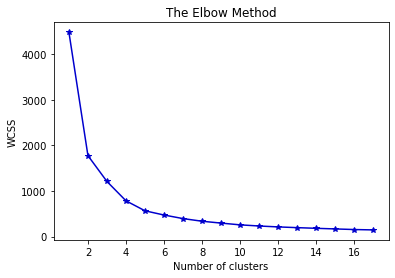

In [44]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 18), wcss,color = "mediumblue",marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 50)
y_kmeans = kmeans.fit_predict(X)

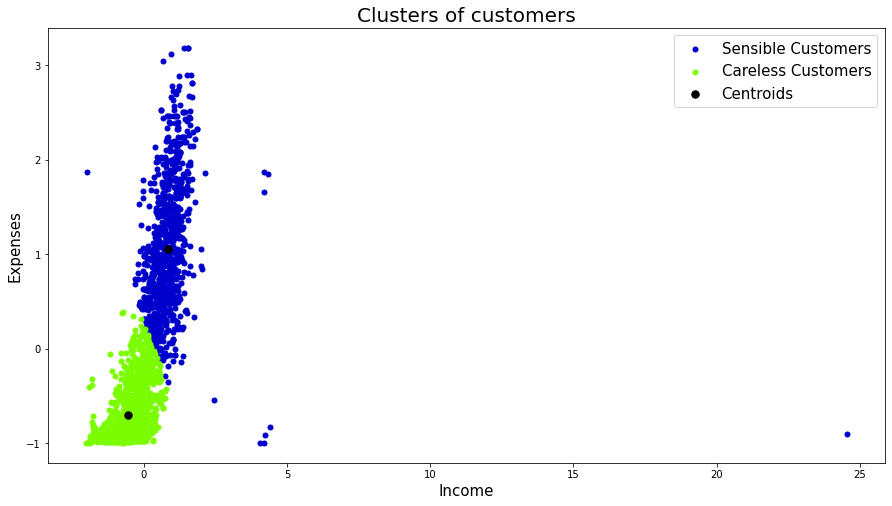

In [46]:
# Visualising the clusters
plt.figure(figsize= (15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'mediumblue', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'lawngreen', label = 'Careless Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 55, c = 'black', label = 'Centroids')
plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

*Customer who has Low income and Low Expenses are Sensible customers.
*Customer who has Low income and High Expenses are Careless customers.

*The highest Birth rate of customers is 87.
*97.58% of the customers are "Post graduated"
. * More than half of the customers are in a relationship - 64.46%.
* Minimum Expenses - 5.
* Maximum Expenses - 2525.
* Mean Expenses - 605.7982.
* 79.33% of the customers who accepted the offer in the campaign is 0.
* Minimum NumTotalPurchases - 0.
* Maximum NumTotalPurchases - 44.
* Mean NumTotalPurchases - 14.8620.
* More than half are 8 years old customers.
* Minimum Income - 1730.
* Maximum Income - 666666.
* Mean Income - 52237.9754.
* The highest Expenses rate for Post Graduated Customers is 97.58%.
* The highest Expenses rate for Customers who are in a Relationship is 64.46%.
* The highest Expenses rate for Customers who have one Kid is 50.35%.
* The highest Expenses rate for Customers who accepted the offer in the campaign "0" is 79.33%.
* The highest Expenses rate for 8 years old Customers is 53.08%.



For this part of the problem, I will be performing multinomial classification on the promotions section of the data.
I will use a XGBoost Classifier to classify if a customer is one of the following:

1. Will part in no promotions.
2. Will part in one promotion.
3. Will part in more than one promotions.

Since I am doing multimodal classification with 3 classes, I will have 3 different SHAP analyses.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [48]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\numpy/marketing_campaign.csv',delimiter='\t')

In [49]:
df.dropna(inplace = True)
print("No of data points in data are : " , len(df))

No of data points in data are :  2216


In [50]:
## Dt_Customer: Date of customer's enrollment with the company
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates= []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))



days = []
d1 = max(dates) 
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_days"] = days
df["Customer_days"] = pd.to_numeric(df["Customer_days"], errors="coerce")

The newest customer's enrolment date in the records: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [51]:
### Age will provide more clearity
df["Age"] = 2021-df["Year_Birth"]  

## Let's see whole spending
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]


## Let's define Marital Status in a more  better way to get more clarity how many members are in household
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

## To get a more clarity about family's background
df["Children"]=df["Kidhome"]+df["Teenhome"]


df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]


df["Is_Parent"] = np.where(df.Children> 0, 1, 0)




### Dropping the engineered features
features_to_drop = ["ID","Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"]
df.drop(features_to_drop, axis=1,inplace = True)

In [52]:
cont_vars = ['Income','Spent',"MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds",'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth','Recency','Children']



In [53]:
# Spent vs Products
Product_vars = ['MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']



In [54]:
Personal_vars = ['Customer_days','Age','Education','Kidhome','Teenhome','Children','Family_Size','Is_Parent','Living_With']
plt.figure(figsize = (10,7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [55]:
Place_vars = ['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [56]:
df["Total"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]


In [57]:
promotion_vars.append('NumDealsPurchases')
promotion_vars.remove('Complain')
promotion_vars

NameError: name 'promotion_vars' is not defined

In [ ]:
df_promotion = df[promotion_vars]
df_promotion.head() 

In [ ]:
train,test = train_test_split(df_promotion,test_size= 0.2)


In [ ]:
X_train = train.drop('Response',axis = 1)
y_train = train['Response']
X_test = test.drop('Response',axis = 1)
y_test = test['Response']

In [ ]:
xgb = XGBClassifier()
fit =xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_pred,y_test)

# SHAP Analysis

In [ ]:
pred = xgb.predict(X_test, output_margin=True)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

In [ ]:
shap.summary_plot(shap_values, X_test)

Run SHAP analysis on the model results
It looks like the campaigns had a very least effect on people and it has'nt pulled the audience to buy the product. Deals made with Disocunt may had been able to make more effect then Campaigns.Perhaps there is a need of better targeted and well planned campaigns.

Recommendation to business for the next round of campaigns.
Discounts can be mentioned in the campaigns
Campaigns should be more family oriented as we saw our data mostly contains families
A strategy can be followed as we have already clustered data so we can provide valid recommendations to customers according to their interests.
Some discounts can be made on products displayed via campaign so that to sell more products at a cheap rate. This will help to retain customers.
